In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
from scipy.signal import welch
from detect_peaks import detect_peaks
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy #seems non beneficial
from scipy.signal import hilbert

In [2]:
#Import Machine Learning Libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Get Parameters from GUI
#Hardcoded here
#needs updating
n = 2000 / 60
N = 16
Bd = 0.331*254
Pd = 2.815*254
phi = 15.17 * np.pi / 180
SampleFrequency = 20000
FileOfInterest = '2003.10.22.12.06.24'
HomeDirectory = os.getcwd()
os.chdir(HomeDirectory)
directory = os.listdir(HomeDirectory)
TrainingDataFile = "DELETE.csv"

In [4]:
#Get Training Data
for file in directory:
    if file == TrainingDataFile:
        dataset = pd.read_csv(file,header = 0,index_col = 0)

X = dataset.values[:,1:(dataset.shape[1]-1)]
Y = dataset.values[:,0]
validation_size = 0.20
seed = 6
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)   

In [5]:
#Train Model
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, Y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, Y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, Y_test)))
Y_test_pred = clf.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

Accuracy on training set is : 1.0
Accuracy on test set is : 0.9246376811594202
                         precision    recall  f1-score   support

                  Early       0.98      0.91      0.94       276
       Imminent Failure       1.00      0.75      0.86        20
     Inner Race Failure       0.90      1.00      0.95         9
                 Normal       0.91      0.96      0.93       879
Rolling Element Failure       0.98      0.94      0.96        63
        Stage 2 Failure       0.94      0.98      0.96        64
                Suspect       0.92      0.84      0.88       414

            avg / total       0.93      0.92      0.92      1725



In [6]:
data = pd.read_table(FileOfInterest,header = None)
data.columns = ['b1x','b1y','b2x','b2y','b3x','b3y','b4x','b4y']
b1x = np.transpose(data.values[:,0])

In [7]:
#Compute need info using GUI inputs and data information
NumberOfSamples = len(b1x)
dt = 1/SampleFrequency
Tmax = dt*NumberOfSamples
t = np.arange(0,Tmax,dt) #same as x*dt
print(Tmax)

1.024


['Early']


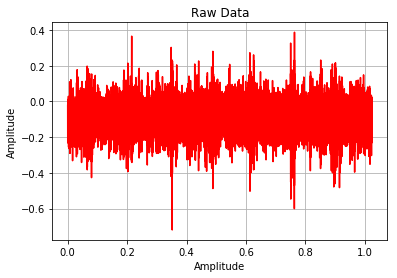

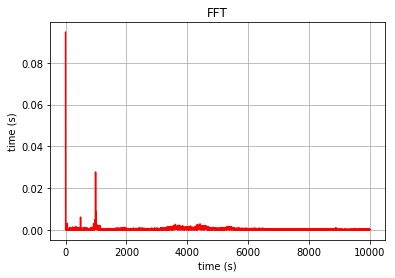

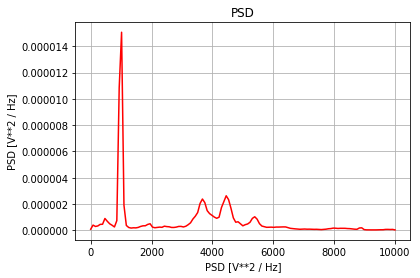

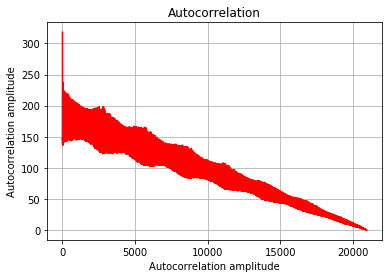

In [8]:
from Functions import getCompleteDataFrame
from Functions import getGraphs
from Functions import getTESTDataFrame
TEST = getTESTDataFrame(b1x,Tmax,NumberOfSamples,SampleFrequency,n,N,Bd,Pd,phi)
TEST1 = TEST.values[:,0:(TEST.shape[1]-1)]
OUTCOME = clf.predict(TEST1)
print(OUTCOME)
figs = getGraphs(b1x,Tmax,NumberOfSamples,SampleFrequency,n,N,Bd,Pd,phi,file,1)

In [9]:
m = dataset
m = m.drop(columns = 'State')
print(m.columns)

Index(['Motor Type AC(1)-DC(0)', 'Shaft Speed [Hz]', 'BPFI', 'BPFO', 'BSF',
       'FTF', 'RMS', 'STD', 'Mean', 'Max', 'Min', 'Peak-to-Peak', 'Max ABS',
       'Kurtosis', 'Skew', 'FFT Frq @ Peak 1', 'FFT Frq @ Peak 2',
       'FFT Frq @ Peak 3', 'FFT Frq @ Peak 4', 'FFT Frq @ Peak 5',
       'FFT Amp @ Peak 1', 'FFT Amp @ Peak 2', 'FFT Amp @ Peak 3',
       'FFT Amp @ Peak 4', 'FFT Amp @ Peak 5', 'PSD Frq @ Peak 1',
       'PSD Frq @ Peak 2', 'PSD Frq @ Peak 3', 'PSD Frq @ Peak 4',
       'PSD Frq @ Peak 5', 'PSD Amp @ Peak 1', 'PSD Amp @ Peak 2',
       'PSD Amp @ Peak 3', 'PSD Amp @ Peak 4', 'PSD Amp @ Peak 5',
       'Autocorrelate Time @ Peak 1', 'Autocorrelate Time @ Peak 2',
       'Autocorrelate Time @ Peak 3', 'Autocorrelate Time @ Peak 4',
       'Autocorrelate Time @ Peak 5', 'Autocorrelate @ Peak 1',
       'Autocorrelate @ Peak 2', 'Autocorrelate @ Peak 3',
       'Autocorrelate @ Peak 4', 'Autocorrelate @ Peak 5'],
      dtype='object')


In [10]:
RFE_3feature_results = [42, 41, 40, 39, 38, 37, 1, 1, 36, 15, 19, 6, 13, 2, 25, 5, 8, 16, 23, 22, 9, 17, 21, 12, 4, 20, 10, 27, 32, 30, 3, 18, 29, 26, 33, 11, 14, 24, 34, 35, 1, 7, 28, 31]
print(RFE_3feature_results)
Index = [i for i, x in enumerate(RFE_3feature_results) if x == 1]
print(Index)
for i in Index:
    print(m.columns[i])


[42, 41, 40, 39, 38, 37, 1, 1, 36, 15, 19, 6, 13, 2, 25, 5, 8, 16, 23, 22, 9, 17, 21, 12, 4, 20, 10, 27, 32, 30, 3, 18, 29, 26, 33, 11, 14, 24, 34, 35, 1, 7, 28, 31]
[6, 7, 40]
RMS
STD
Autocorrelate @ Peak 1


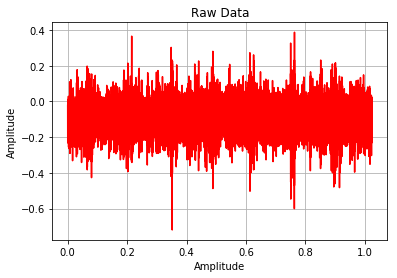

In [11]:
figs[0]

In [12]:
print(TEST.columns)
print(TEST['BSF'].values)

Index(['Motor Type AC(1)-DC(0)', 'Shaft Speed [Hz]', 'BPFI', 'BPFO', 'BSF',
       'FTF', 'RMS', 'STD', 'Mean', 'Max', 'Min', 'Peak-to-Peak', 'Max ABS',
       'Kurtosis', 'Skew', 'FFT Frq @ Peak 1', 'FFT Frq @ Peak 2',
       'FFT Frq @ Peak 3', 'FFT Frq @ Peak 4', 'FFT Frq @ Peak 5',
       'FFT Amp @ Peak 1', 'FFT Amp @ Peak 2', 'FFT Amp @ Peak 3',
       'FFT Amp @ Peak 4', 'FFT Amp @ Peak 5', 'PSD Frq @ Peak 1',
       'PSD Frq @ Peak 2', 'PSD Frq @ Peak 3', 'PSD Frq @ Peak 4',
       'PSD Frq @ Peak 5', 'PSD Amp @ Peak 1', 'PSD Amp @ Peak 2',
       'PSD Amp @ Peak 3', 'PSD Amp @ Peak 4', 'PSD Amp @ Peak 5',
       'Autocorrelate Time @ Peak 1', 'Autocorrelate Time @ Peak 2',
       'Autocorrelate Time @ Peak 3', 'Autocorrelate Time @ Peak 4',
       'Autocorrelate Time @ Peak 5', 'Autocorrelate @ Peak 1',
       'Autocorrelate @ Peak 2', 'Autocorrelate @ Peak 3',
       'Autocorrelate @ Peak 4', 'Autocorrelate @ Peak 5'],
      dtype='object')
[139.91665579]


In [14]:
print(str(float(TEST['BSF'].values)))

139.91665578625418


In [15]:
print(TEST['BSF'].values + 3)

[142.91665579]


In [16]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

#from Functions import truncate

str(truncate(TEST.loc[0].at['BSF'],3))

'139.916'